## Comprehensive Data Exploration with Python (summary)

- By: [Pedro Marcelino](http://pmarcelino.com) - February 2017
- Kaggle Code: [here](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python)
- **About**: Great starting point

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler  # To standarize featrues
from scipy import stats                           # To call statistical functions
import warnings                                   # To control warning messages
warnings.filterwarnings('ignore')                 # Ignore warnings
# Makes plot appear inside notebook:
%matplotlib inline

df_train = pd.read_csv('../CSV/train.csv')

### 1. Variable analysis

Excel spreadhseet for variable study. Name: `variable_study.csv`.  
**Column names**:
- Variable **name**: name.
- **Type**: continuos vs. discrete.
- **Segment**: defined as **space**, **building** and **location**.
- **Expectation** (**6th sense**): what we think impacts *SalePrice* (**High**, **Medium** and **Low**).
  - Do we think about this variable?
  - How important is it?
  - Information given by other variable?
- **Conclusion**: what we think after study of data. Same scale as Expectation.
- **Comments**: general info.
Review **High** *Expectation* defined variables and make **scatter plots** with *SalePrice*, filling the *Conclusion* column.

#### 1. Drop columns that have too many NaN

In [22]:
df_train.info()
df_train.drop(columns=['Id', 'Alley', 'MiscFeature', 'Fence', 'MasVnrType', 'FireplaceQu', 'PoolQC'], inplace=True, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 2. Make a CSV file to looks for variables correlations as suggested (`variable_study.csv`)

#### 3. Plot all numerical variables and look for strong correlation

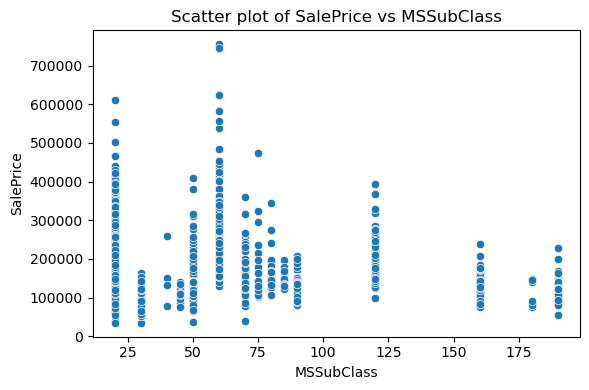

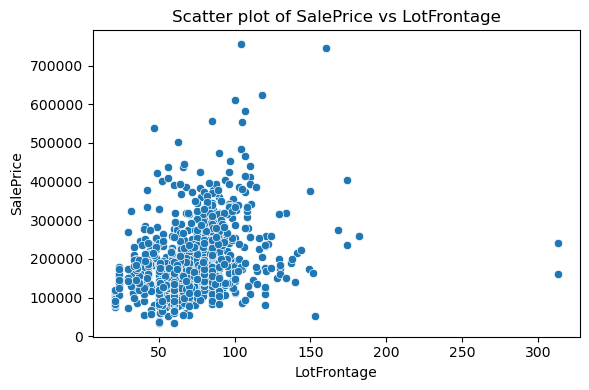

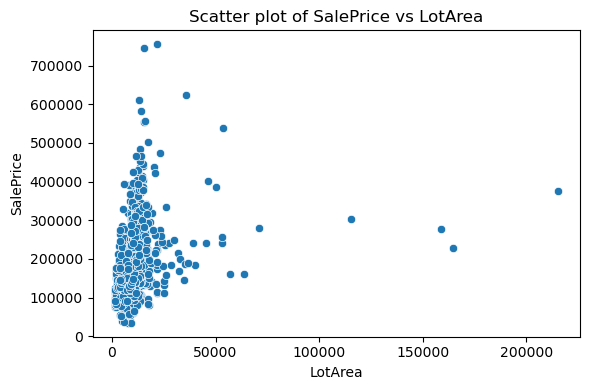

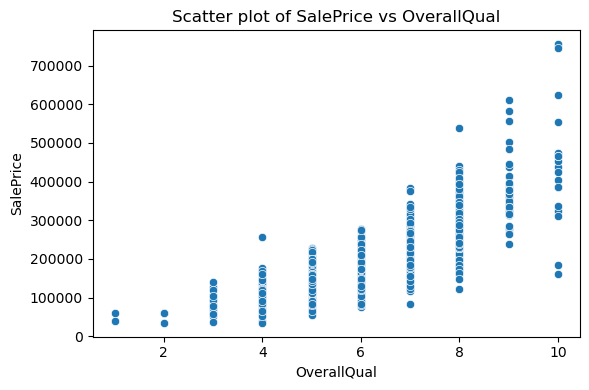

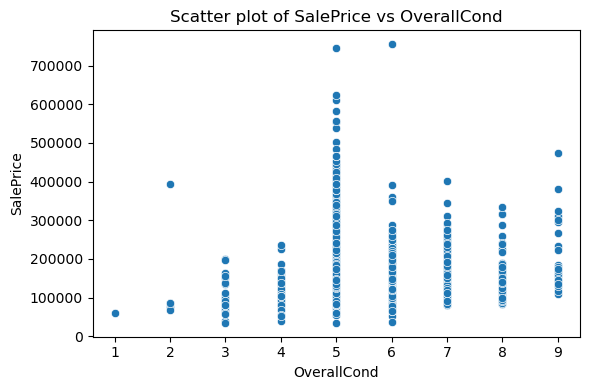

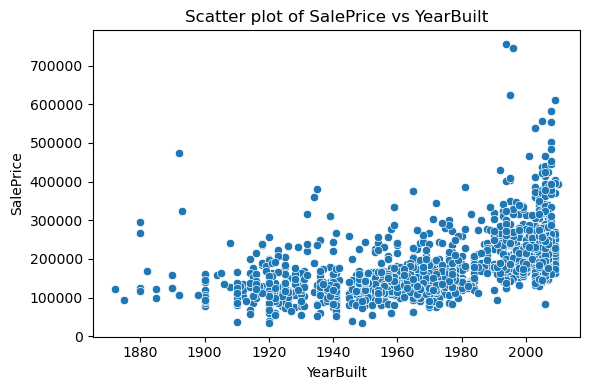

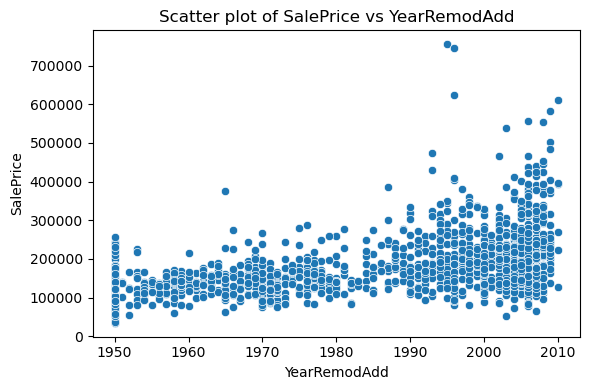

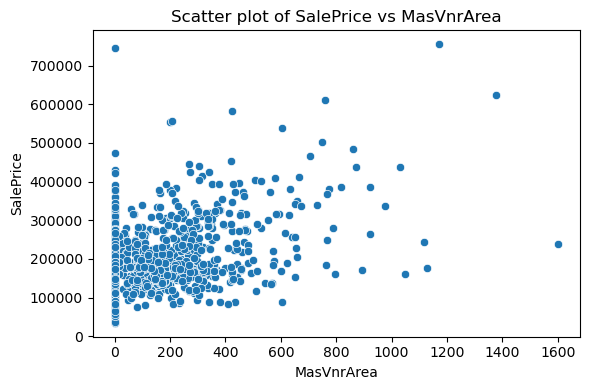

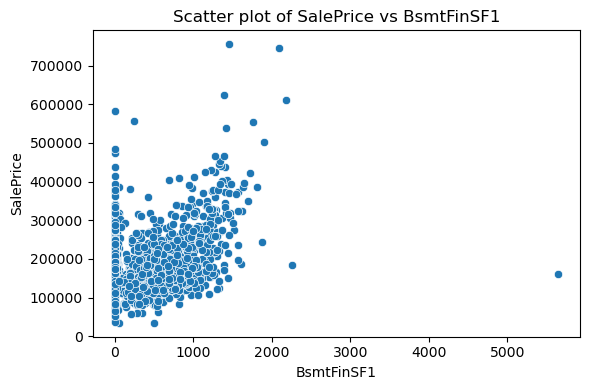

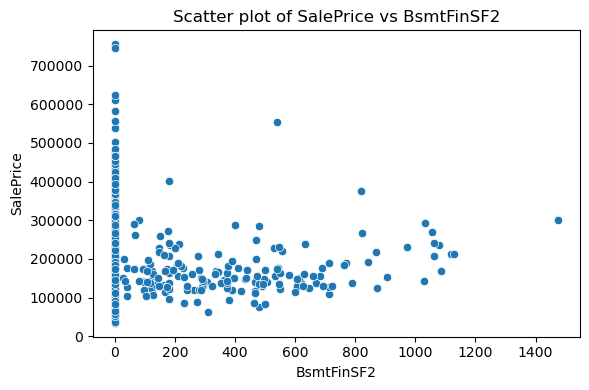

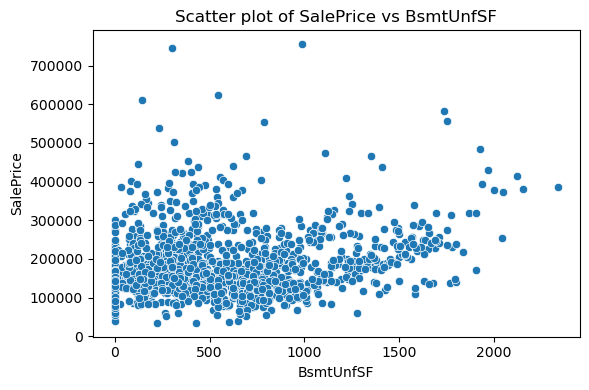

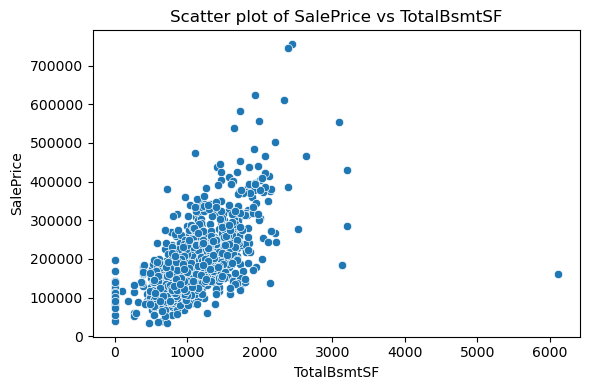

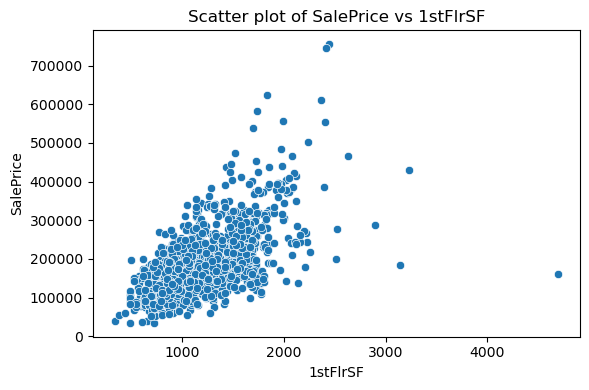

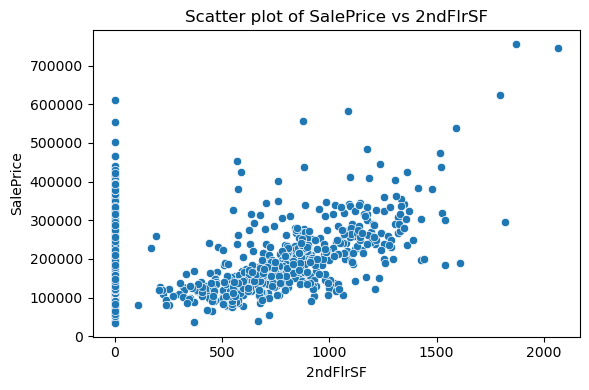

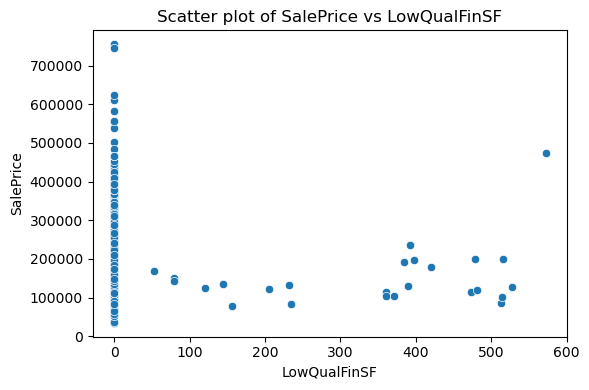

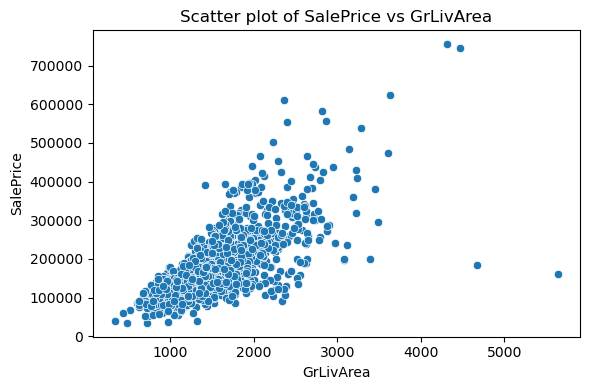

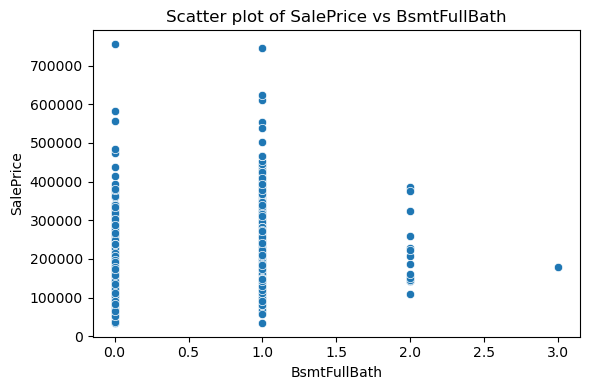

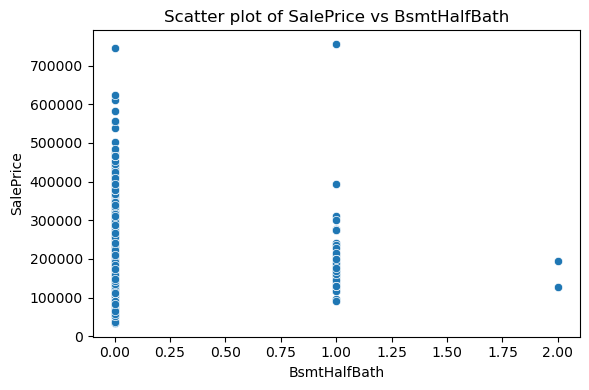

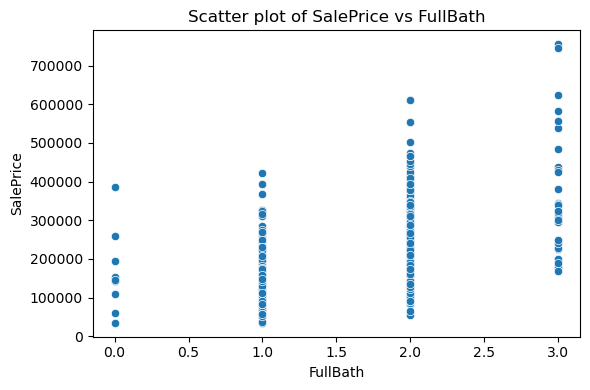

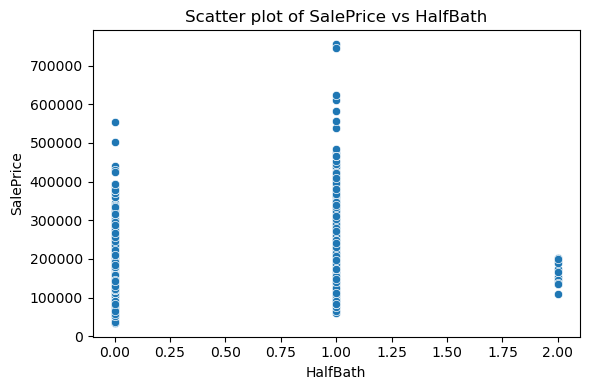

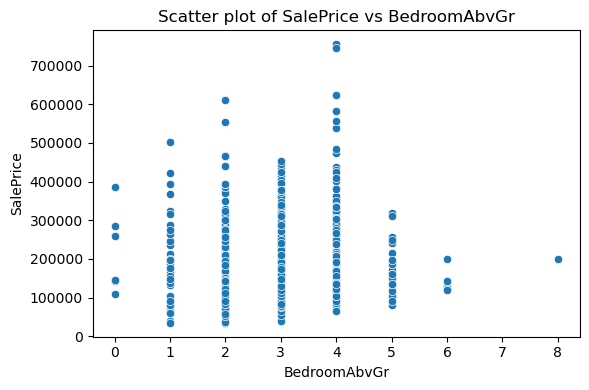

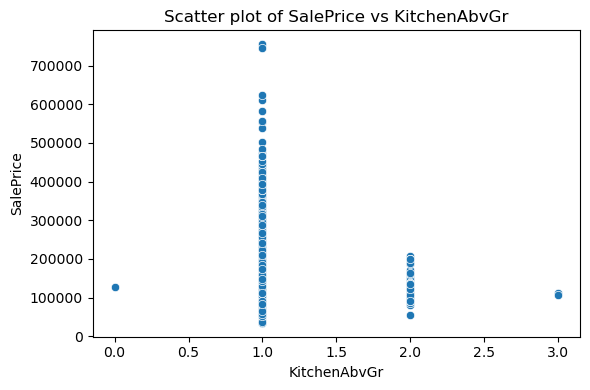

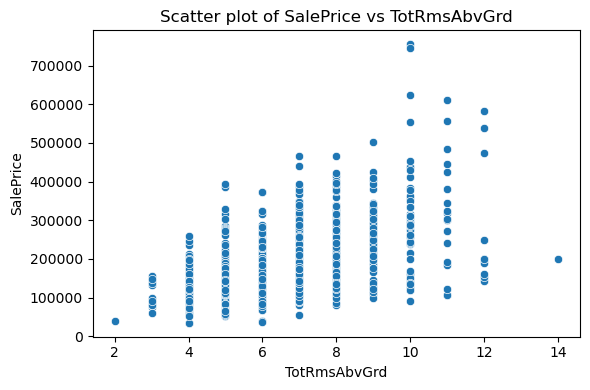

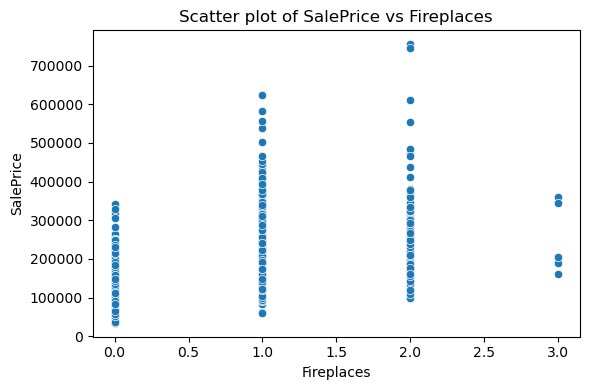

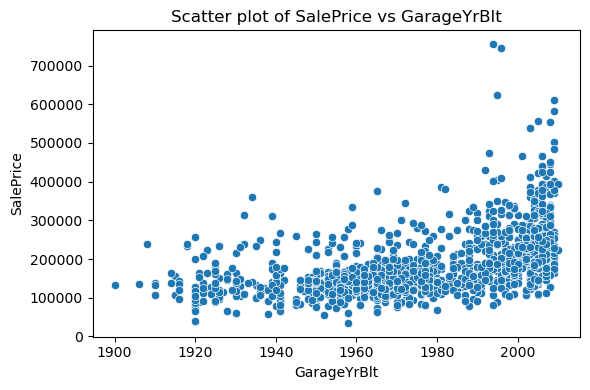

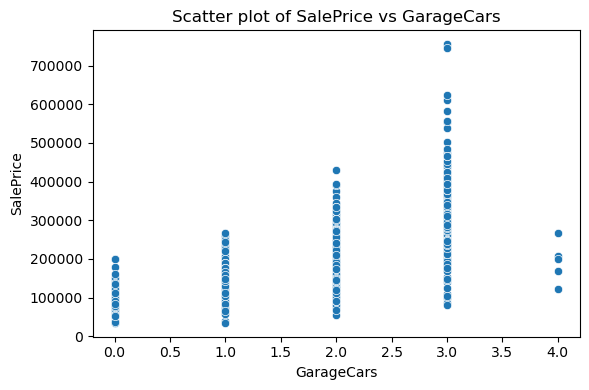

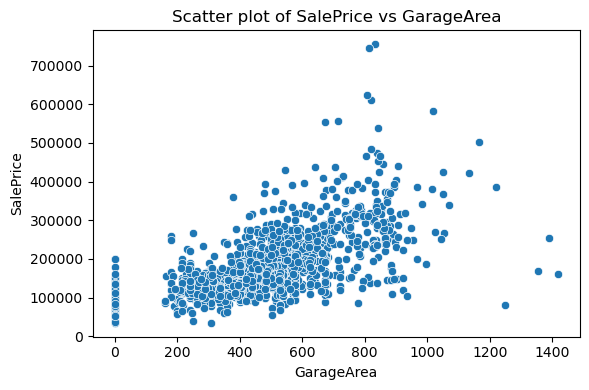

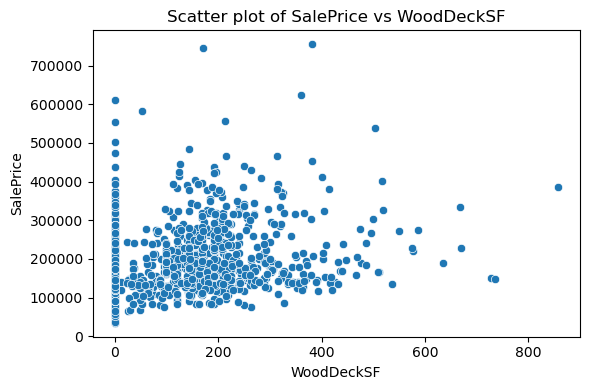

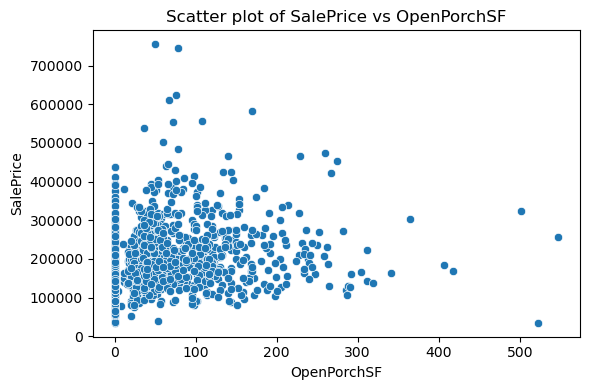

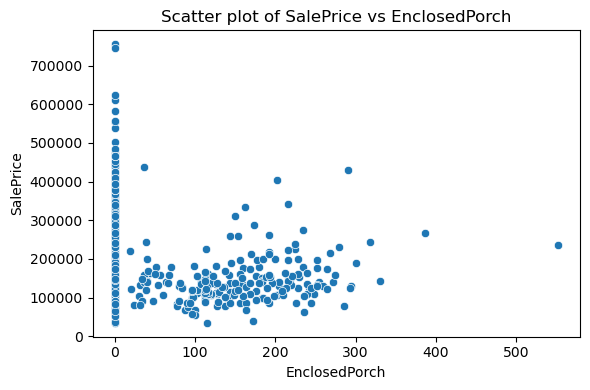

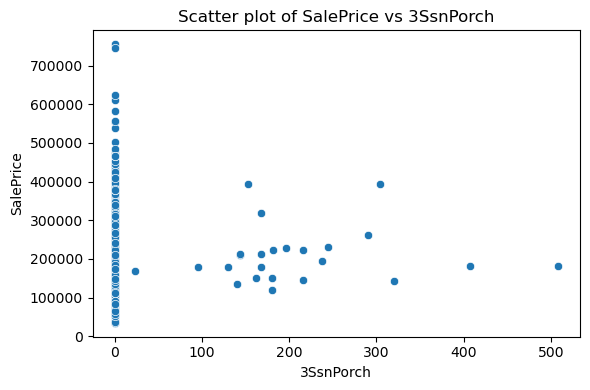

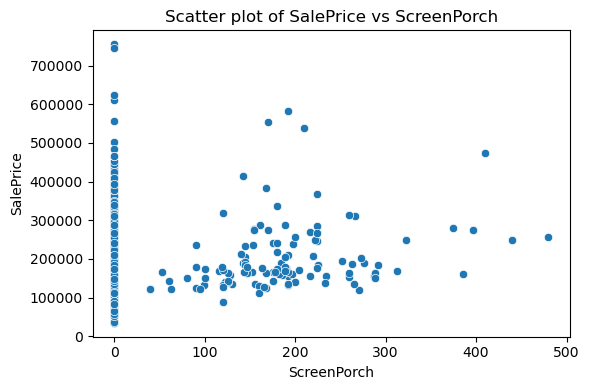

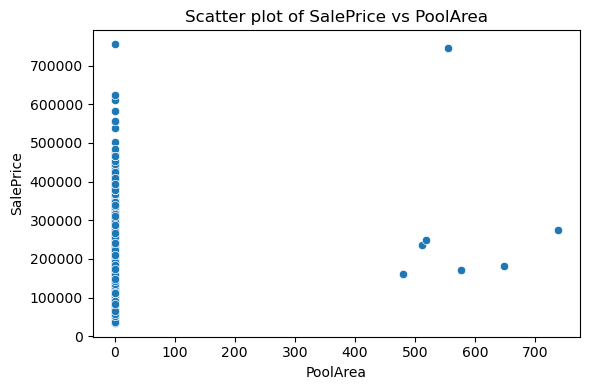

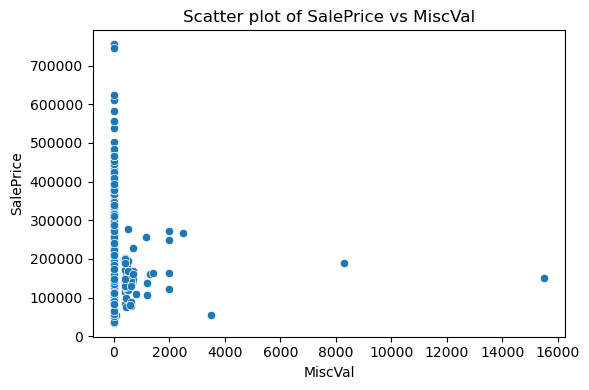

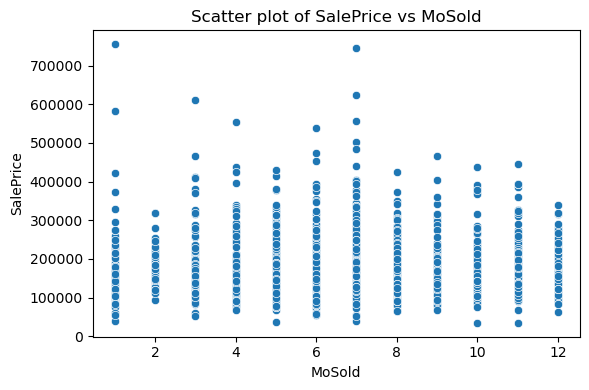

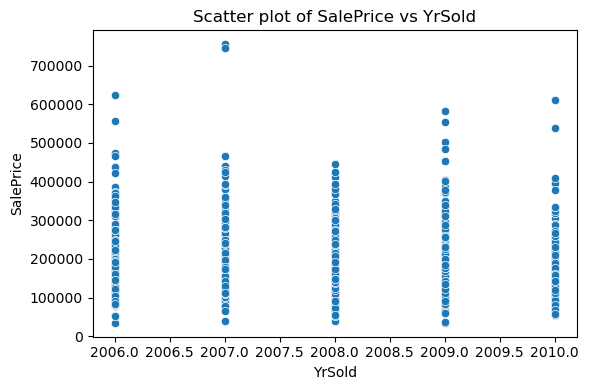

In [4]:
# Make a scatter plot of all numerical variables to see correlation
numerical_vars = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_vars.remove('SalePrice')  # Exclude target from X

# Create scatter plots for all numerical variables vs SalePrice
for col in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'Scatter plot of SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

#### 4. Convert to numerical all variables that have a grading system and look for correlation

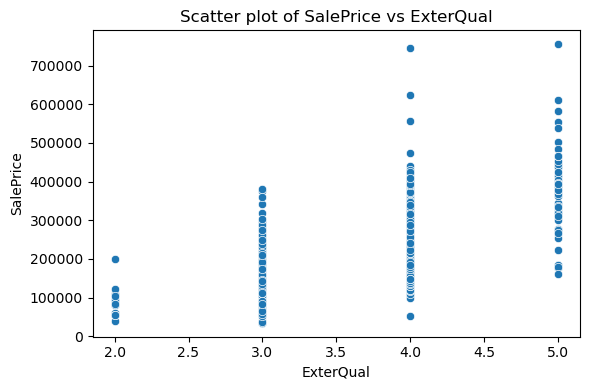

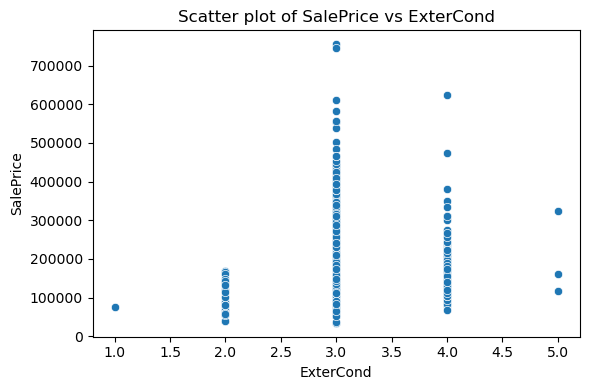

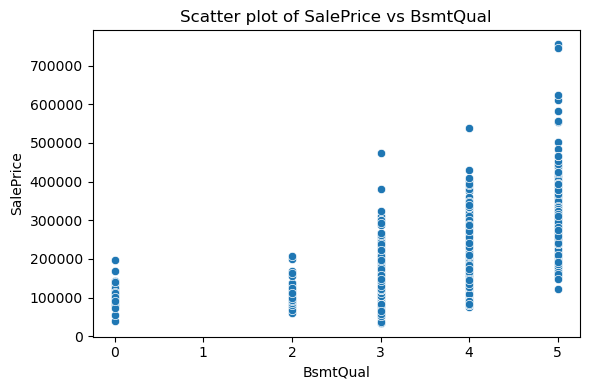

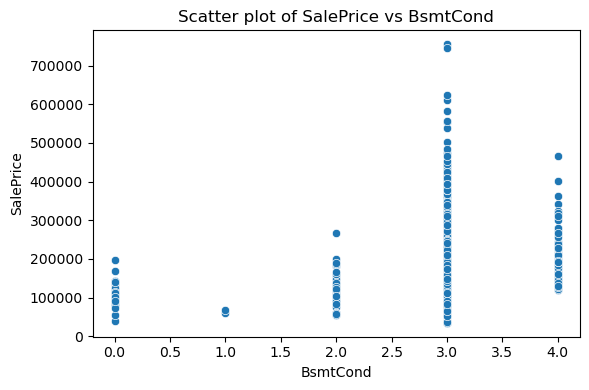

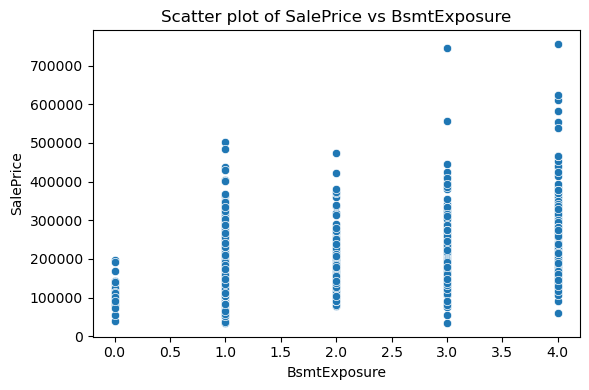

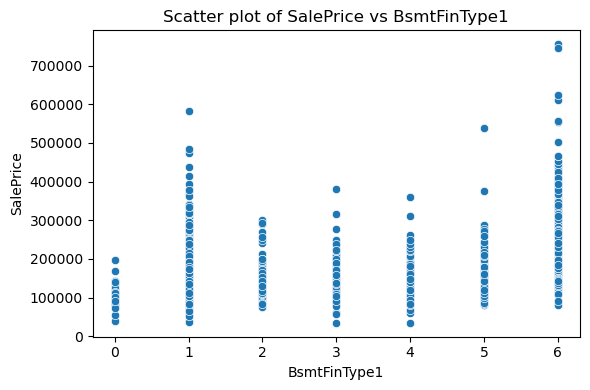

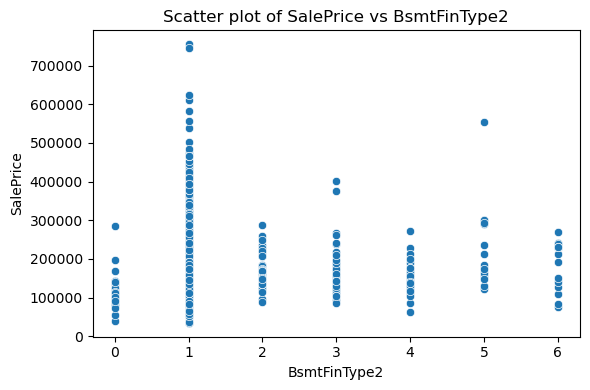

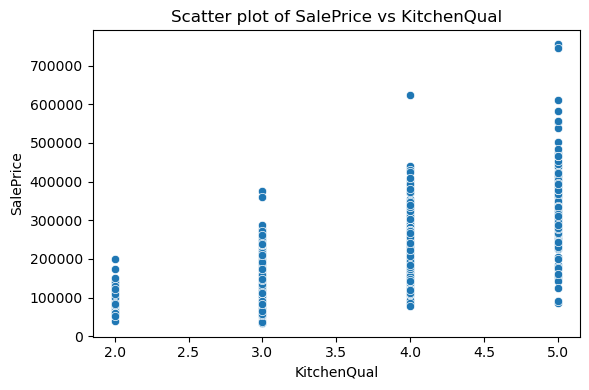

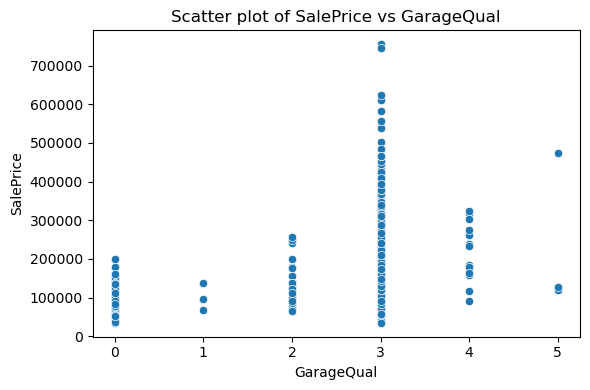

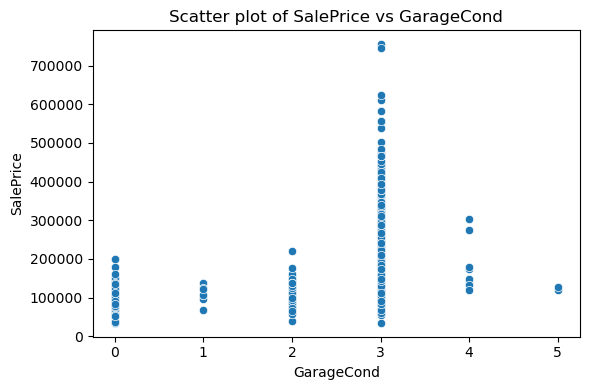

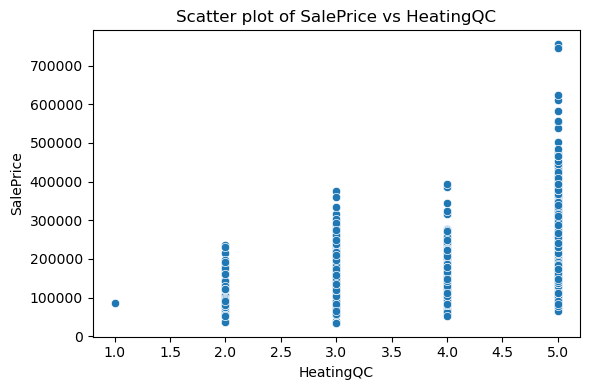

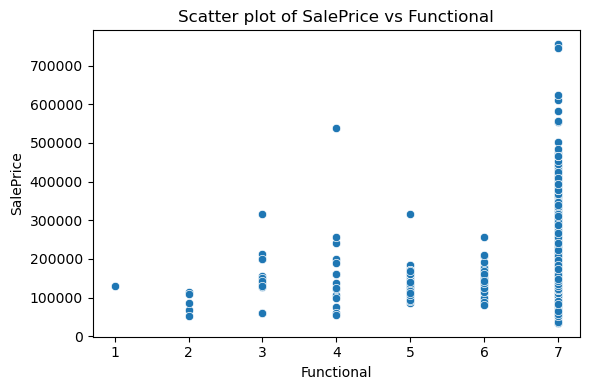

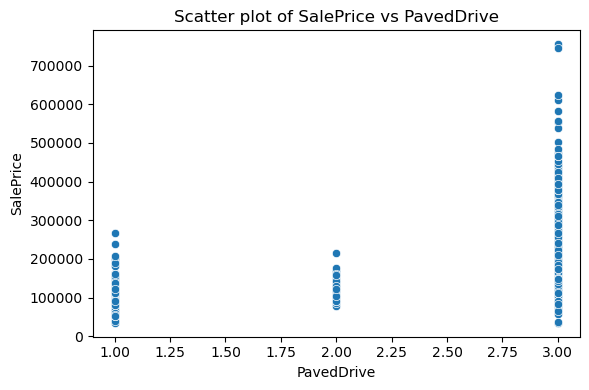

In [5]:
# OverallQual and OverallCond are already numeric, no mapping needed

df_train['ExterQual'] = df_train['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}).fillna(0)
df_train['ExterCond'] = df_train['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}).fillna(0)
df_train['BsmtQual'] = df_train['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_train['BsmtCond'] = df_train['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_train['BsmtExposure'] = df_train['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}).fillna(0)
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}).fillna(0)
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}).fillna(0)
df_train['KitchenQual'] = df_train['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}).fillna(0)
df_train['GarageQual'] = df_train['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_train['GarageCond'] = df_train['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_train['HeatingQC'] = df_train['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}).fillna(0)
df_train['Functional'] = df_train['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0}).fillna(0)
df_train['PavedDrive'] = df_train['PavedDrive'].map({'Y':3, 'P':2, 'N':1}).fillna(0)

ordinal_vars = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'GarageQual',
    'GarageCond', 'HeatingQC', 'Functional', 'PavedDrive'
]

# Create scatter plots for all numerical variables vs SalePrice
for col in ordinal_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'Scatter plot of SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

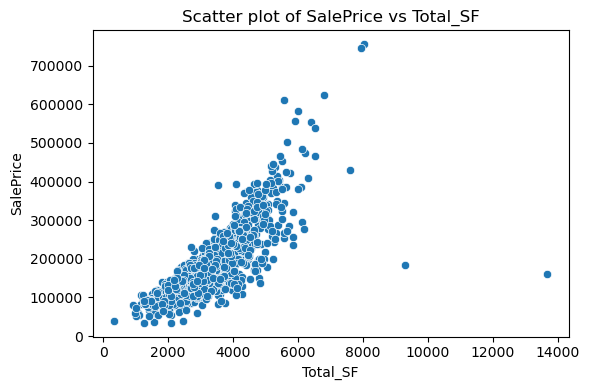

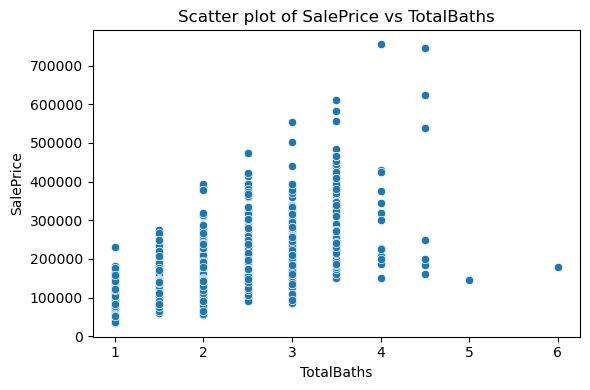

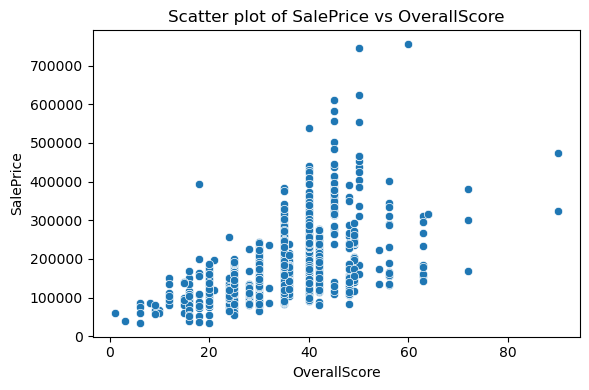

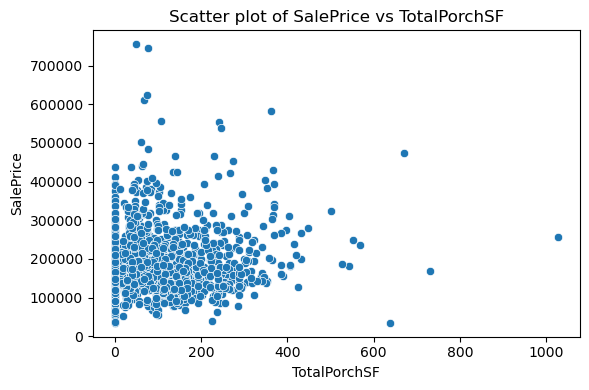

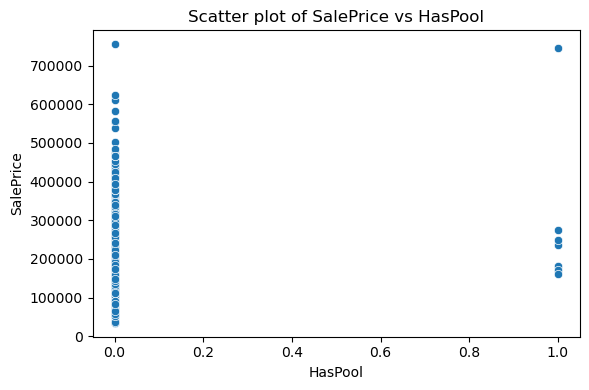

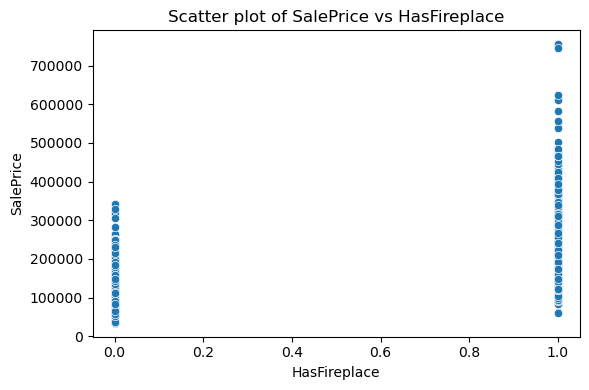

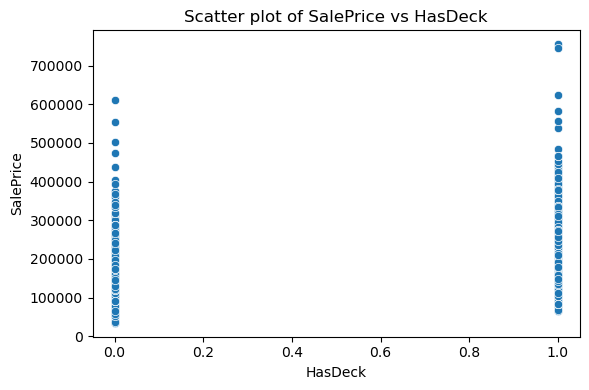

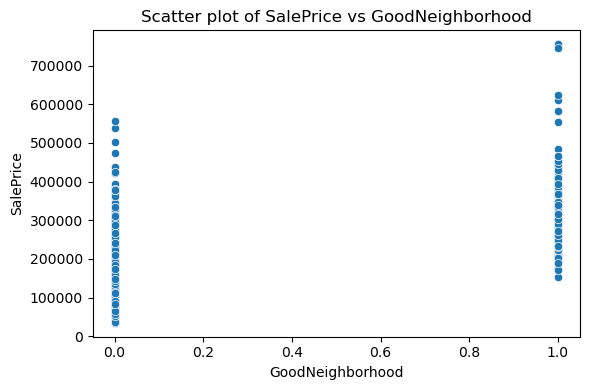

In [6]:
# Total SF
df_train['Total_SF'] = df_train['GrLivArea'] + df_train['TotalBsmtSF'] + df_train['GarageArea'] + df_train['WoodDeckSF'] + df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
df_train['TotalBaths'] = df_train['FullBath'] + 0.5 * df_train['HalfBath'] + df_train['BsmtFullBath'] + 0.5 * df_train['BsmtHalfBath']
df_train['OverallScore'] = df_train['OverallQual'] * df_train['OverallCond']
df_train['TotalPorchSF'] = df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
df_train['HasPool'] = (df_train['PoolArea'] > 0).astype(int)
df_train['HasFireplace'] = (df_train['Fireplaces'] > 0).astype(int)
df_train['HasDeck'] = (df_train['WoodDeckSF'] > 0).astype(int)
top10_neigh = df_train.groupby('Neighborhood')['SalePrice'].mean().nlargest(int(len(df_train['Neighborhood'].unique())*0.1)).index
df_train['GoodNeighborhood'] = df_train['Neighborhood'].apply(lambda x: 1 if x in top10_neigh else 0)

engineered_vars = [
    'Total_SF', 'TotalBaths', 'OverallScore', 'TotalPorchSF',
    'HasPool', 'HasFireplace', 'HasDeck', 'GoodNeighborhood'
]

# Create scatter plots for all engineered variables vs SalePrice
for col in engineered_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'Scatter plot of SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

#### 5. Show scatter plots of all definitively chosen variables

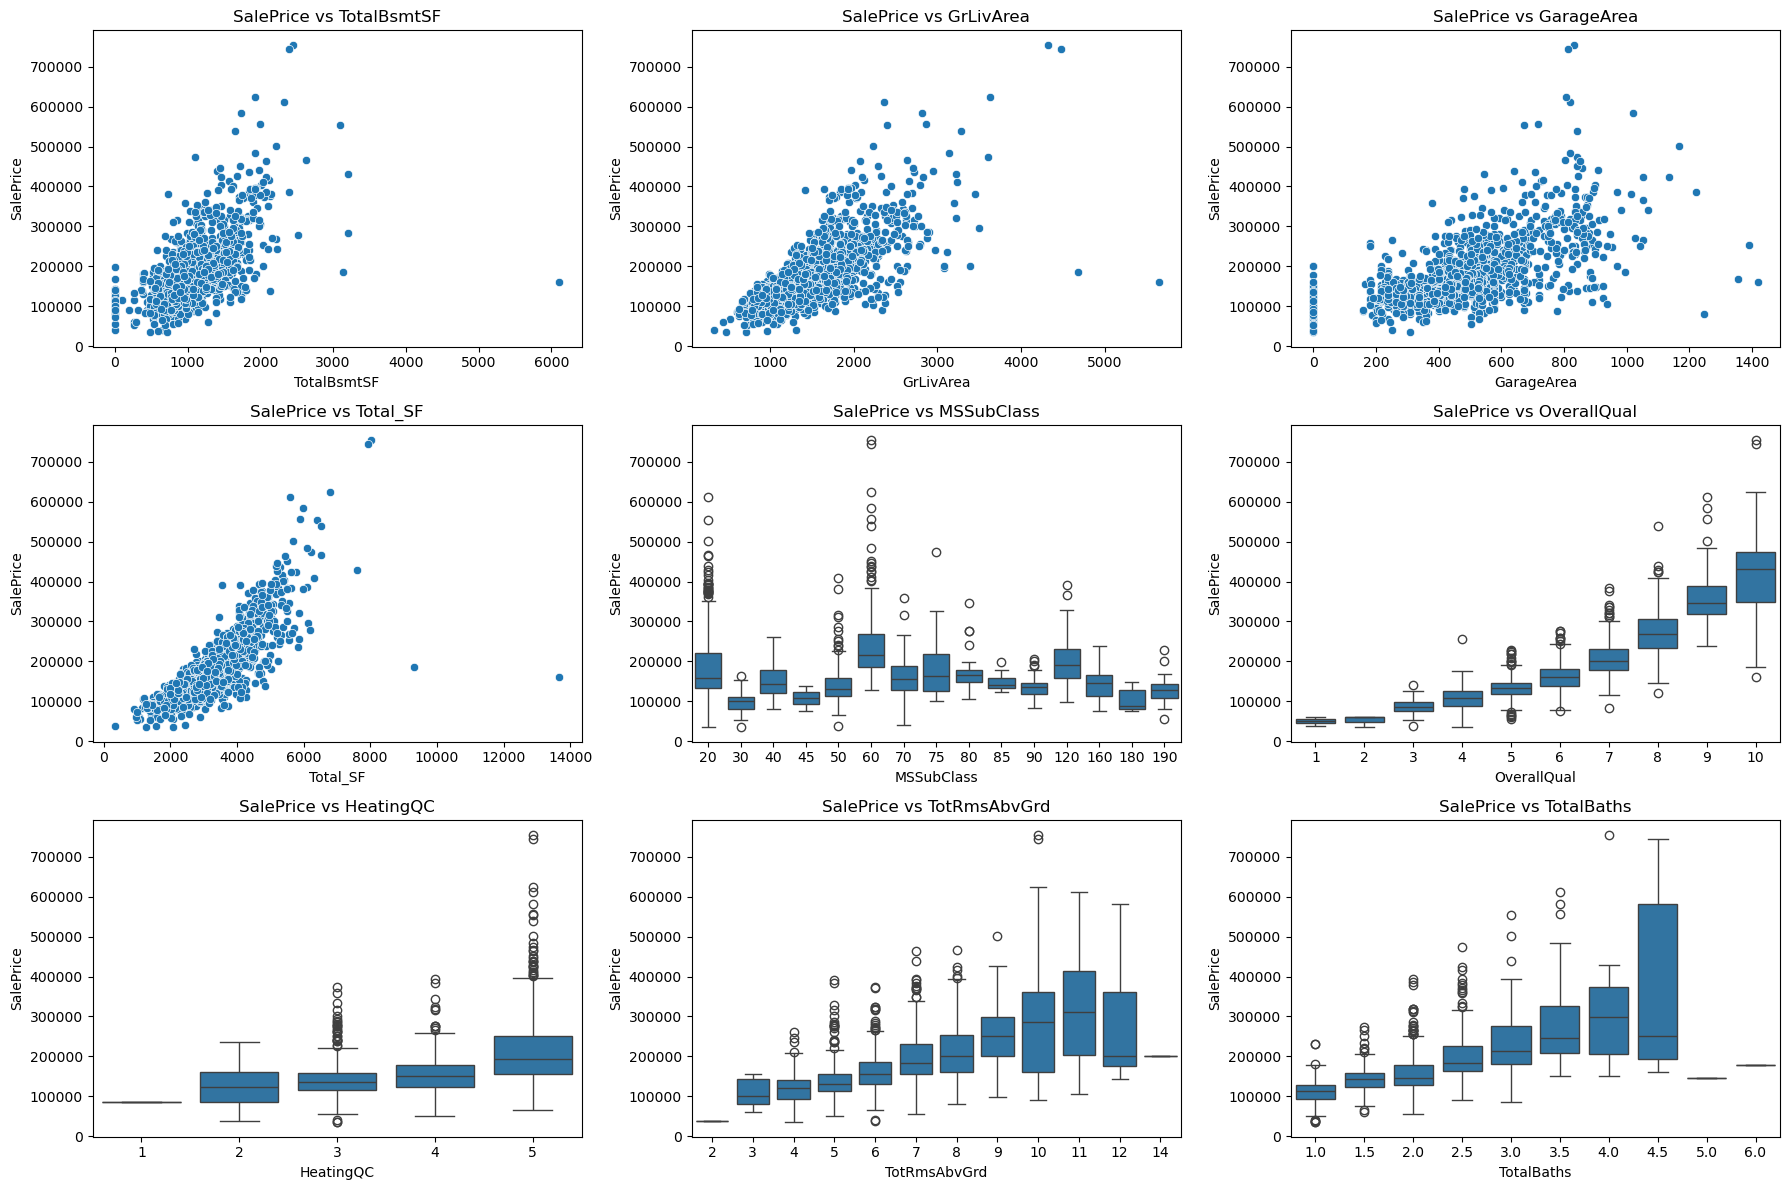

In [7]:
final_vars_scatter = ['TotalBsmtSF', 'GrLivArea', 'GarageArea', 'Total_SF']
final_vars_boxplot = ['MSSubClass', 'OverallQual', 'HeatingQC', 'TotRmsAbvGrd', 'TotalBaths']

all_vars = [(col, 'scatter') for col in final_vars_scatter] + [(col, 'box') for col in final_vars_boxplot]

# Determine number of rows and columns for the grid
n_vars = len(all_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

# Create a big figure
plt.figure(figsize=(6 * n_cols, 4 * n_rows))

# Loop through variables and create plots
for i, (col, plot_type) in enumerate(all_vars, 1):
    plt.subplot(n_rows, n_cols, i)
    if plot_type == 'scatter':
        sns.scatterplot(data=df_train, x=col, y='SalePrice')
    else:
        sns.boxplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

### 2. Analyzing `SalePrice`

- Check `df[val].describe()` for bad values.
- Histogram of the variable

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


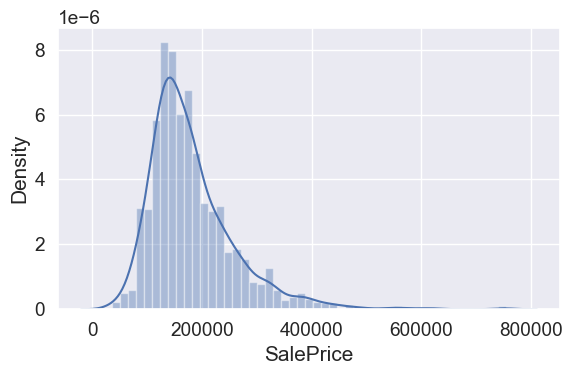

Skewness: 1.882876
Kurtosis: 6.536282


In [23]:
# Variable .describe()
print(df_train['SalePrice'].describe())


# Histogram
plt.figure(figsize=(6, 4))
sns.distplot(df_train['SalePrice']);
plt.tight_layout()
plt.show()

# Skewness and Kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

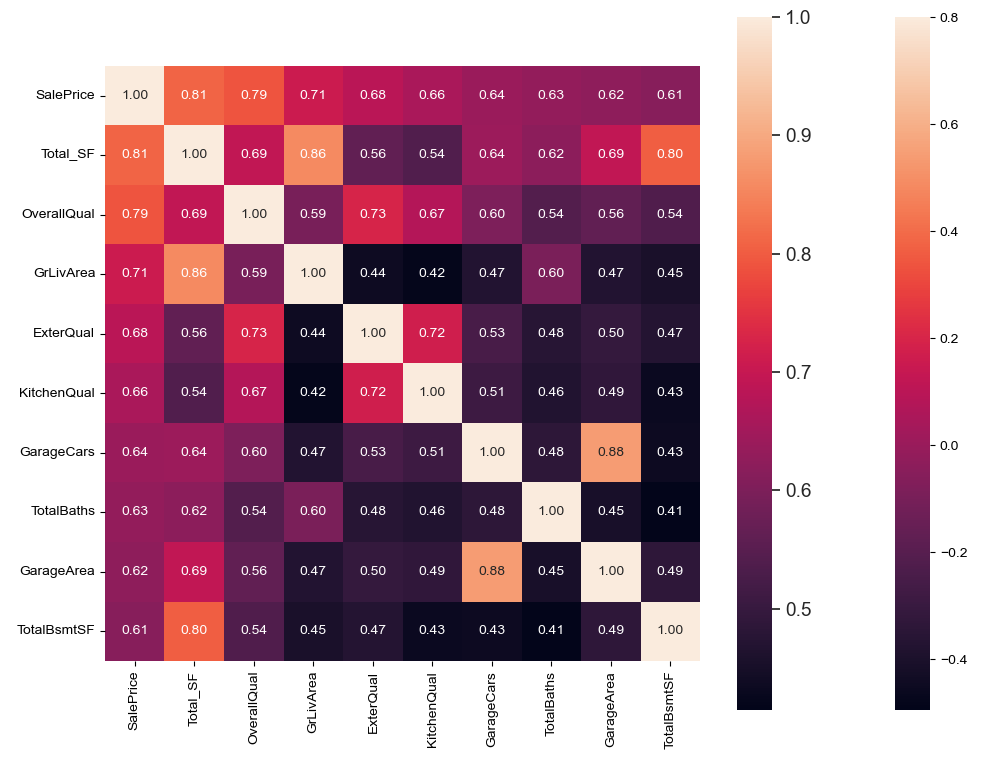

In [9]:
# Correlation matrix (only numerical values)
corrmat = df_train.select_dtypes(include=['int64', 'float64']).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Findings**:
- **ExterQual** and **KitchenQual** can be substituted by **OverallQual**, which has higher correlation.
- **GarageCars** seems to have more correlation whtan **GarageArea**.
- **MSSubClass**, **HeatingQC**, **TotRmsAbvGrd** are nowhere to be seen.  

**Final variables**: *Total_SF*, *OverallQual*, *GrLivArea*, *ExterQual*, *GarageCars*, *TotalBaths*, *TotalBsmtSF*.

### 3. Missing data and standarizing variables (check for outliers)

Look for missing data

In [37]:
# Missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [31]:
# Standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'].values.reshape(-1, 1))
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


## A study on Regression applied to the Ames dataset (summary)

- By: [Julien Cohen-Solal](http://pmarcelino.com) - 2017
- Kaggle Code: [here](https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
- **About**: feature engineering, linear regression, but easy to beginners

## Regularized Linear Models (summary)

- By: [Alexandru Papiu](http://apapiu.github.io/) - 2022
- Kaggle Code: [here](https://www.kaggle.com/code/apapiu/regularized-linear-models)
- **About**: starter kernel on modelling and cross validation

## Stacked Regressions: Top 4% on LeaderBoard (summary)

- By: [Serigne](http://apapiu.github.io/) - July 2017
- Kaggle Code: [here](https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard)
- **About**: summary of previous 3.

## XGBoost + Lasso (summary)

- By: [Human Analog](https://www.kaggle.com/code/humananalog/xgboost-lasso) - 2017
- Kaggle Code: [here](https://www.kaggle.com/code/humananalog/xgboost-lasso)
- **About**: feature engineering, XGBoost and Lasso